In [1]:
import os
import glob
import numpy as np

# Plots and Images
import matplotlib.pyplot as plt
from IPython.display import Image
import SimpleITK as sitk

# Tensorflow and Keras
import tensorflow as tf
import keras
from tensorflow.keras.utils import load_img, img_to_array
from tensorflow.keras.preprocessing.image import smart_resize
from tensorflow.image import rgb_to_grayscale
from keras import models
from keras.preprocessing.image import ImageDataGenerator
import boto3
import pandas as pd
import s3fs
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv3D
import os
import numpy as np
import pydicom
import SimpleITK as sitk

In [3]:
import tensorflow as tf
import pandas as pd
import tflearn
from tflearn.layers.conv import conv_3d, max_pool_3d
from tflearn.layers.core import input_data, dropout, fully_connected
from tflearn.layers.estimator import regression
import numpy as np
import matplotlib.pyplot as plt

Instructions for updating:
non-resource variables are not supported in the long term


In [32]:
import os
import glob
import copy
import time

import numpy as np
import pandas as pd

from tqdm.notebook import tqdm
from collections import namedtuple
from sagemaker.pytorch import PyTorch

import torch
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn
import torch.optim as optim

ModuleNotFoundError: No module named 'torch'

In [30]:
!conda install torch

Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: failed with initial frozen solve. Retrying with flexible solve.

PackagesNotFoundError: The following packages are not available from current channels:

  - torch

Current channels:

  - https://repo.anaconda.com/pkgs/main/linux-64
  - https://repo.anaconda.com/pkgs/main/noarch
  - https://repo.anaconda.com/pkgs/r/linux-64
  - https://repo.anaconda.com/pkgs/r/noarch

To search for alternate channels that may provide the conda package you're
looking for, navigate to

    https://anaconda.org

and use the search bar at the top of the page.




In [7]:
session = boto3.Session(
    aws_access_key_id=aws_access_key_id,
    aws_secret_access_key=aws_secret_access_key
)
s3 = session.resource('s3')
bucket = s3.Bucket('fastvision.ai')

In [163]:
import boto3
import os

# Set the name of your S3 bucket
bucket_name = 'fastvision.ai'
# Set the prefix of the folder you want to download files from
folder_prefix = 'raw-data/luna16/segmented_normalized_2mm/'
local_directory = 'data'

# Create an S3 client
s3_client = boto3.client('s3')

# List objects in the folder
objects = s3_client.list_objects_v2(Bucket=bucket_name, Prefix=folder_prefix)['Contents']

# Iterate through the objects in the folder
for obj in objects:
    # Get the file name from the object key
    file_name = os.path.basename(obj['Key'])
    
    # Check if the file ends with ".mhd"
    if file_name.endswith('.mhd')or file_name.endswith('.raw'):
        # Create the local file path for downloading
        local_file_path = os.path.join(local_directory, file_name)
        print(local_file_path)
        
        # Download the file
        s3_client.download_file(bucket_name, obj['Key'], local_file_path)

data/1.3.6.1.4.1.14519.5.2.1.6279.6001.100530488926682752765845212286.mhd
data/1.3.6.1.4.1.14519.5.2.1.6279.6001.100530488926682752765845212286.raw
data/1.3.6.1.4.1.14519.5.2.1.6279.6001.100620385482151095585000946543.mhd
data/1.3.6.1.4.1.14519.5.2.1.6279.6001.100620385482151095585000946543.raw
data/1.3.6.1.4.1.14519.5.2.1.6279.6001.100621383016233746780170740405.mhd
data/1.3.6.1.4.1.14519.5.2.1.6279.6001.100621383016233746780170740405.raw
data/1.3.6.1.4.1.14519.5.2.1.6279.6001.100684836163890911914061745866.mhd
data/1.3.6.1.4.1.14519.5.2.1.6279.6001.100684836163890911914061745866.raw
data/1.3.6.1.4.1.14519.5.2.1.6279.6001.100953483028192176989979435275.mhd
data/1.3.6.1.4.1.14519.5.2.1.6279.6001.100953483028192176989979435275.raw
data/1.3.6.1.4.1.14519.5.2.1.6279.6001.102133688497886810253331438797.mhd
data/1.3.6.1.4.1.14519.5.2.1.6279.6001.102133688497886810253331438797.raw
data/1.3.6.1.4.1.14519.5.2.1.6279.6001.103115201714075993579787468219.mhd
data/1.3.6.1.4.1.14519.5.2.1.6279.6001

In [162]:
import zipfile
import os

# Specify the folder path containing the files to be zipped
folder_path = 'data'

# Specify the path for the resulting zip file
zip_file_path = 'zipfile.zip'

# Create a zip file
with zipfile.ZipFile(zip_file_path, 'w', zipfile.ZIP_DEFLATED) as zipf:
    for root, dirs, files in os.walk(folder_path):
        for file in files:
            file_path = os.path.join(root, file)
            zipf.write(file_path, arcname=os.path.relpath(file_path, folder_path))


(256, 256, 256)


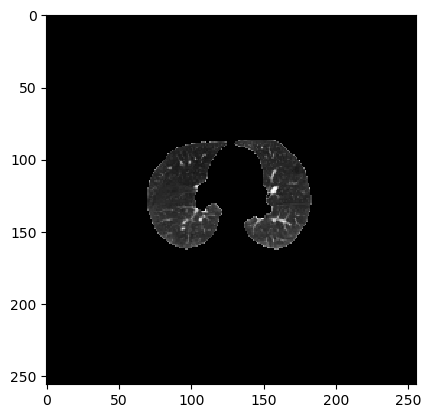

(256, 256, 256)


In [8]:
mhd_file = sitk.ReadImage('data/1.3.6.1.4.1.14519.5.2.1.6279.6001.803808126682275425758092691689.mhd')
ct_scan = np.array(sitk.GetArrayFromImage(mhd_file), dtype=np.float32)
print(ct_scan.shape)
# Find the minimum value in the array
# Displays an image slice
plt.imshow(ct_scan[128], cmap='gray')
plt.show()
print(ct_scan.shape)

In [13]:
file_key = 'raw-data/luna16/candidates.csv'
obj = bucket.Object(file_key)
df_candidates = pd.read_csv(obj.get()['Body'])
df_candidates.head()

,seriesuid,coordX,coordY,coordZ,class
0,1.3.6.1.4.1.14519.5.2.1.6279.6001.100225287222...,-56.08,-67.85,-311.92,0
1,1.3.6.1.4.1.14519.5.2.1.6279.6001.100225287222...,53.21,-244.41,-245.17,0
2,1.3.6.1.4.1.14519.5.2.1.6279.6001.100225287222...,103.66,-121.80,-286.62,0
3,1.3.6.1.4.1.14519.5.2.1.6279.6001.100225287222...,-33.66,-72.75,-308.41,0
4,1.3.6.1.4.1.14519.5.2.1.6279.6001.100225287222...,-32.25,-85.36,-362.51,0


In [10]:
data_ann.shape

(1186, 5)

In [14]:
df_annotations =data_ann


In [48]:
df['class'].value_counts()

0    753418
1      1557
Name: class, dtype: int64

In [49]:
df.shape

(754975, 5)

In [50]:
group = df.groupby('seriesuid').agg({'class': 'count'})
group

,class
seriesuid,
1.3.6.1.4.1.14519.5.2.1.6279.6001.100225287222365663678666836860,1068
1.3.6.1.4.1.14519.5.2.1.6279.6001.100332161840553388986847034053,496
1.3.6.1.4.1.14519.5.2.1.6279.6001.100398138793540579077826395208,1135
1.3.6.1.4.1.14519.5.2.1.6279.6001.100530488926682752765845212286,472
1.3.6.1.4.1.14519.5.2.1.6279.6001.100620385482151095585000946543,434
...,...
1.3.6.1.4.1.14519.5.2.1.6279.6001.979083010707182900091062408058,1024
1.3.6.1.4.1.14519.5.2.1.6279.6001.980362852713685276785310240144,357
1.3.6.1.4.1.14519.5.2.1.6279.6001.986011151772797848993829243183,1109


In [9]:
file_key = 'raw-data/luna16/annotations.csv'
obj = bucket.Object(file_key)
data_ann = pd.read_csv(obj.get()['Body'])
data_ann.head()

,seriesuid,coordX,coordY,coordZ,diameter_mm
0,1.3.6.1.4.1.14519.5.2.1.6279.6001.100225287222...,-128.699421,-175.319272,-298.387506,5.651471
1,1.3.6.1.4.1.14519.5.2.1.6279.6001.100225287222...,103.783651,-211.925149,-227.121250,4.224708
2,1.3.6.1.4.1.14519.5.2.1.6279.6001.100398138793...,69.639017,-140.944586,876.374496,5.786348
3,1.3.6.1.4.1.14519.5.2.1.6279.6001.100621383016...,-24.013824,192.102405,-391.081276,8.143262
4,1.3.6.1.4.1.14519.5.2.1.6279.6001.100621383016...,2.441547,172.464881,-405.493732,18.545150


In [52]:
grouped = data_ann.groupby('seriesuid').agg({'diameter_mm': 'count'})
grouped = grouped.reset_index(drop=False)
grouped

,seriesuid,diameter_mm
0,1.3.6.1.4.1.14519.5.2.1.6279.6001.100225287222...,2
1,1.3.6.1.4.1.14519.5.2.1.6279.6001.100398138793...,1
2,1.3.6.1.4.1.14519.5.2.1.6279.6001.100621383016...,4
3,1.3.6.1.4.1.14519.5.2.1.6279.6001.100953483028...,1
4,1.3.6.1.4.1.14519.5.2.1.6279.6001.102681962408...,1
...,...,...
596,1.3.6.1.4.1.14519.5.2.1.6279.6001.970428941353...,2
597,1.3.6.1.4.1.14519.5.2.1.6279.6001.975426625618...,1
598,1.3.6.1.4.1.14519.5.2.1.6279.6001.979083010707...,1
599,1.3.6.1.4.1.14519.5.2.1.6279.6001.994459772950...,3


In [53]:
data_ann['Duplicate_Count'] = data_ann.groupby('seriesuid')['seriesuid'].transform('size')
data_ann

,seriesuid,coordX,coordY,coordZ,diameter_mm,Duplicate_Count
0,1.3.6.1.4.1.14519.5.2.1.6279.6001.100225287222...,-128.699421,-175.319272,-298.387506,5.651471,2
1,1.3.6.1.4.1.14519.5.2.1.6279.6001.100225287222...,103.783651,-211.925149,-227.121250,4.224708,2
2,1.3.6.1.4.1.14519.5.2.1.6279.6001.100398138793...,69.639017,-140.944586,876.374496,5.786348,1
3,1.3.6.1.4.1.14519.5.2.1.6279.6001.100621383016...,-24.013824,192.102405,-391.081276,8.143262,4
4,1.3.6.1.4.1.14519.5.2.1.6279.6001.100621383016...,2.441547,172.464881,-405.493732,18.545150,4
...,...,...,...,...,...,...
1181,1.3.6.1.4.1.14519.5.2.1.6279.6001.994459772950...,-160.856298,-28.560349,-269.168728,5.053694,3
1182,1.3.6.1.4.1.14519.5.2.1.6279.6001.994459772950...,-102.189570,-73.865766,-220.536241,4.556101,3
1183,1.3.6.1.4.1.14519.5.2.1.6279.6001.994459772950...,-37.535409,64.041949,-127.687101,4.357368,3
1184,1.3.6.1.4.1.14519.5.2.1.6279.6001.997611074084...,43.196112,74.438486,-200.523314,4.277203,2


In [54]:
grouped['Duplicate_Count'] = grouped.groupby('seriesuid')['seriesuid'].transform('size')
grouped

,seriesuid,diameter_mm,Duplicate_Count
0,1.3.6.1.4.1.14519.5.2.1.6279.6001.100225287222...,2,1
1,1.3.6.1.4.1.14519.5.2.1.6279.6001.100398138793...,1,1
2,1.3.6.1.4.1.14519.5.2.1.6279.6001.100621383016...,4,1
3,1.3.6.1.4.1.14519.5.2.1.6279.6001.100953483028...,1,1
4,1.3.6.1.4.1.14519.5.2.1.6279.6001.102681962408...,1,1
...,...,...,...
596,1.3.6.1.4.1.14519.5.2.1.6279.6001.970428941353...,2,1
597,1.3.6.1.4.1.14519.5.2.1.6279.6001.975426625618...,1,1
598,1.3.6.1.4.1.14519.5.2.1.6279.6001.979083010707...,1,1
599,1.3.6.1.4.1.14519.5.2.1.6279.6001.994459772950...,3,1


In [55]:
data_ann.shape

(1186, 6)

In [56]:
result_df = data_ann.merge(df, on='seriesuid', how='left')

In [57]:
result_df.shape

(1132399, 10)

In [58]:
result_df.head()

,seriesuid,coordX_x,coordY_x,coordZ_x,diameter_mm,Duplicate_Count,coordX_y,coordY_y,coordZ_y,class
0,1.3.6.1.4.1.14519.5.2.1.6279.6001.100225287222...,-128.699421,-175.319272,-298.387506,5.651471,2,68.420000,-74.480000,-288.700000,0
1,1.3.6.1.4.1.14519.5.2.1.6279.6001.100225287222...,-128.699421,-175.319272,-298.387506,5.651471,2,-95.209361,-91.809406,-377.426350,0
2,1.3.6.1.4.1.14519.5.2.1.6279.6001.100225287222...,-128.699421,-175.319272,-298.387506,5.651471,2,-24.766755,-120.379294,-273.361539,0
3,1.3.6.1.4.1.14519.5.2.1.6279.6001.100225287222...,-128.699421,-175.319272,-298.387506,5.651471,2,-63.080000,-65.740000,-344.240000,0
4,1.3.6.1.4.1.14519.5.2.1.6279.6001.100225287222...,-128.699421,-175.319272,-298.387506,5.651471,2,52.946688,-92.688873,-241.067872,0


In [59]:
result_df['class'].value_counts()

0    1127927
1       4472
Name: class, dtype: int64

In [60]:
x =(result_df['diameter_mm']==0).any()
print(x)


False


In [61]:
result_df['Duplicate_Count'] = result_df.groupby('seriesuid')['seriesuid'].transform('size')

In [62]:
result_df

,seriesuid,coordX_x,coordY_x,coordZ_x,diameter_mm,Duplicate_Count,coordX_y,coordY_y,coordZ_y,class
0,1.3.6.1.4.1.14519.5.2.1.6279.6001.100225287222...,-128.699421,-175.319272,-298.387506,5.651471,2136,68.420000,-74.480000,-288.700000,0
1,1.3.6.1.4.1.14519.5.2.1.6279.6001.100225287222...,-128.699421,-175.319272,-298.387506,5.651471,2136,-95.209361,-91.809406,-377.426350,0
2,1.3.6.1.4.1.14519.5.2.1.6279.6001.100225287222...,-128.699421,-175.319272,-298.387506,5.651471,2136,-24.766755,-120.379294,-273.361539,0
3,1.3.6.1.4.1.14519.5.2.1.6279.6001.100225287222...,-128.699421,-175.319272,-298.387506,5.651471,2136,-63.080000,-65.740000,-344.240000,0
4,1.3.6.1.4.1.14519.5.2.1.6279.6001.100225287222...,-128.699421,-175.319272,-298.387506,5.651471,2136,52.946688,-92.688873,-241.067872,0
...,...,...,...,...,...,...,...,...,...,...
1132394,1.3.6.1.4.1.14519.5.2.1.6279.6001.997611074084...,-21.958478,33.486096,-155.292026,23.802913,1956,-33.400000,-64.200000,-115.560000,0
1132395,1.3.6.1.4.1.14519.5.2.1.6279.6001.997611074084...,-21.958478,33.486096,-155.292026,23.802913,1956,56.236359,70.352400,-203.446236,0
1132396,1.3.6.1.4.1.14519.5.2.1.6279.6001.997611074084...,-21.958478,33.486096,-155.292026,23.802913,1956,-97.104221,55.738289,-203.879785,0
1132397,1.3.6.1.4.1.14519.5.2.1.6279.6001.997611074084...,-21.958478,33.486096,-155.292026,23.802913,1956,-65.470000,59.670000,-136.370000,0


In [63]:
new_df = result_df[['seriesuid','class']]
new_df

,seriesuid,class
0,1.3.6.1.4.1.14519.5.2.1.6279.6001.100225287222...,0
1,1.3.6.1.4.1.14519.5.2.1.6279.6001.100225287222...,0
2,1.3.6.1.4.1.14519.5.2.1.6279.6001.100225287222...,0
3,1.3.6.1.4.1.14519.5.2.1.6279.6001.100225287222...,0
4,1.3.6.1.4.1.14519.5.2.1.6279.6001.100225287222...,0
...,...,...
1132394,1.3.6.1.4.1.14519.5.2.1.6279.6001.997611074084...,0
1132395,1.3.6.1.4.1.14519.5.2.1.6279.6001.997611074084...,0
1132396,1.3.6.1.4.1.14519.5.2.1.6279.6001.997611074084...,0
1132397,1.3.6.1.4.1.14519.5.2.1.6279.6001.997611074084...,0


In [77]:
new_df['class'].value_counts()

0    1127927
1       4472
Name: class, dtype: int64

In [82]:
new_df['seriesuid'].value_counts()

1.3.6.1.4.1.14519.5.2.1.6279.6001.176030616406569931557298712518    14568
1.3.6.1.4.1.14519.5.2.1.6279.6001.202187810895588720702176009630    12762
1.3.6.1.4.1.14519.5.2.1.6279.6001.328789598898469177563438457842     9612
1.3.6.1.4.1.14519.5.2.1.6279.6001.309955999522338651429118207446     9415
1.3.6.1.4.1.14519.5.2.1.6279.6001.219428004988664846407984058588     8550
                                                                    ...  
1.3.6.1.4.1.14519.5.2.1.6279.6001.123697637451437522065941162930      358
1.3.6.1.4.1.14519.5.2.1.6279.6001.282512043257574309474415322775      326
1.3.6.1.4.1.14519.5.2.1.6279.6001.177252583002664900748714851615      306
1.3.6.1.4.1.14519.5.2.1.6279.6001.801945620899034889998809817499      288
1.3.6.1.4.1.14519.5.2.1.6279.6001.219349715895470349269596532320      215
Name: seriesuid, Length: 601, dtype: int64

In [83]:
grouped_data = new_df.groupby(['seriesuid','class']).agg({'class': 'count'})
grouped = grouped_data.rename(columns={'class': 'flag'})
grouped = grouped.reset_index(drop=False)
grouped.head(20)

,seriesuid,class,flag
0,1.3.6.1.4.1.14519.5.2.1.6279.6001.100225287222...,0,2132
1,1.3.6.1.4.1.14519.5.2.1.6279.6001.100225287222...,1,4
2,1.3.6.1.4.1.14519.5.2.1.6279.6001.100398138793...,0,1134
3,1.3.6.1.4.1.14519.5.2.1.6279.6001.100398138793...,1,1
4,1.3.6.1.4.1.14519.5.2.1.6279.6001.100621383016...,0,3348
5,1.3.6.1.4.1.14519.5.2.1.6279.6001.100621383016...,1,68
6,1.3.6.1.4.1.14519.5.2.1.6279.6001.100953483028...,0,909
7,1.3.6.1.4.1.14519.5.2.1.6279.6001.100953483028...,1,1
8,1.3.6.1.4.1.14519.5.2.1.6279.6001.102681962408...,0,617
9,1.3.6.1.4.1.14519.5.2.1.6279.6001.102681962408...,1,3


In [68]:
new_df.to_csv('output.csv', index=False)

In [65]:
new_df_unique= new_df.drop_duplicates(subset = 'seriesuid')

In [66]:
new_df_unique.shape

(601, 2)

In [67]:
new_df_unique.head()

,seriesuid,class
0,1.3.6.1.4.1.14519.5.2.1.6279.6001.100225287222...,0
2136,1.3.6.1.4.1.14519.5.2.1.6279.6001.100398138793...,0
3271,1.3.6.1.4.1.14519.5.2.1.6279.6001.100621383016...,0
6687,1.3.6.1.4.1.14519.5.2.1.6279.6001.100953483028...,0
7597,1.3.6.1.4.1.14519.5.2.1.6279.6001.102681962408...,0


In [113]:
new_df_unique['class'].value_counts()

0    602
Name: class, dtype: int64

In [116]:
diameters = {}

for _, row in data_ann.iterrows():    
    
    center_xyz = (row.coordX, row.coordY, row.coordZ)   
    
    diameters.setdefault(row.seriesuid, []).append(
        (center_xyz, row.diameter_mm)
    )

In [118]:
data_ann.head()

,seriesuid,coordX,coordY,coordZ,diameter_mm
0,1.3.6.1.4.1.14519.5.2.1.6279.6001.100225287222...,-128.699421,-175.319272,-298.387506,5.651471
1,1.3.6.1.4.1.14519.5.2.1.6279.6001.100225287222...,103.783651,-211.925149,-227.121250,4.224708
2,1.3.6.1.4.1.14519.5.2.1.6279.6001.100398138793...,69.639017,-140.944586,876.374496,5.786348
3,1.3.6.1.4.1.14519.5.2.1.6279.6001.100621383016...,-24.013824,192.102405,-391.081276,8.143262
4,1.3.6.1.4.1.14519.5.2.1.6279.6001.100621383016...,2.441547,172.464881,-405.493732,18.545150


In [ ]:
# CNN Architecture

model = keras.Sequential()

# add first convolution layer to the model
model.add(keras.layers.Conv3D(
    filters=32,
    kernel_size=(3, 3,3),
    strides=(1, 1,1),
    padding='same',
    data_format='channels_last',
    name='conv_1',
    activation='relu'))



# add a max pooling layer with pool size (2,2) and strides of 2
# (this will reduce the spatial dimensions by half)
model.add(keras.layers.MaxPool3D(
    pool_size=(2,2,2),
    name='pool_1'))


# add second convolutional layer
model.add(keras.layers.Conv3D(
    filters=64,
    kernel_size=(3, 3,3),
    strides=(1, 1,1),
    padding='same',
    name='conv_2',
    activation='relu'))


# add second max pooling layer with pool size (2,2) and strides of 2
# (this will further reduce the spatial dimensions by half)
model.add(keras.layers.MaxPool3D(
    pool_size=(2, 2,2), name='pool_2')
)


# add third convolutional layer
model.add(keras.layers.Conv3D(
    filters=128,
    kernel_size=(3, 3,3),
    strides=(1, 1,1),
    padding='same',
    name='conv_3',
    activation='relu'))



# add third max pooling layer with pool size (2,2) and strides of 2
# (this will further reduce the spatial dimensions by half)
model.add(keras.layers.MaxPool3D(
    pool_size=(2, 2,2), name='pool_3')
)

# add fourth convolutional layer
model.add(keras.layers.Conv3D(
    filters=256,
    kernel_size=(3, 3,3),
    strides=(1, 1,1),
    padding='same',
    name='conv_4',
    activation='relu'))


# add fourth max pooling layer with pool size (2,2) and strides of 2
# (this will further reduce the spatial dimensions by half)
model.add(keras.layers.MaxPool3D(
    pool_size=(2, 2,2), name='pool_4')
)


# add a fully connected layer (need to flatten the output of the previous layers first)
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(
    units=256,
    name='fc_1',
    activation='relu'))

# add dropout layer
model.add(keras.layers.Dropout(
    rate=0.2))

# add the last fully connected layer
# we set activation = "sigmoid" that returns class memembership probabilities which is binary in our case
model.add(keras.layers.Dense(
    units=1,
    name='fc_2',
    activation='sigmoid'))


# build model and print summary
tf.random.set_seed(1)
model.build(input_shape=(20, 256, 256, 256, 3))
model.summary()

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

In [ ]:
tf.random.set_seed(1234)
np.random.seed(1234)

In [ ]:
model.fit(train_images, train_labels, epochs=num_epochs, batch_size=batch_size, validation_data=(val_images, val_labels))


In [63]:
hist = history.history
x_arr = np.arange(len(hist['loss'])) + 1

fig = plt.figure(figsize=(25, 8))
ax = fig.add_subplot(1, 2, 1)
ax.plot(x_arr, hist['loss'], '-o', label='Train loss')
ax.plot(x_arr, hist['val_loss'], '--<', label='Validation loss')
ax.legend(fontsize=15)
ax.set_xlabel('Epoch', size=15)
ax.set_ylabel('Loss', size=15)

ax = fig.add_subplot(1, 2, 2)
ax.plot(x_arr, hist['accuracy'], '-o', label='Train acc.')
ax.plot(x_arr, hist['val_accuracy'], '--<', label='Validation acc.')
ax.legend(fontsize=15)
ax.set_xlabel('Epoch', size=15)
ax.set_ylabel('Accuracy', size=15)
plt.show()

In [64]:
test_results = model.evaluate(x_test, y_test)


ClientError: An error occurred (404) when calling the HeadObject operation: Not Found

In [75]:
import torch
from torch import nn
from torch.utils.data import TensorDataset, Dataset, DataLoader
from torch.optim import SGD, Adam
device = 'cuda' if torch.cuda.is_available() else 'cpu'
from torchvision import datasets
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

ModuleNotFoundError: No module named 'torch'

In [74]:
import torch
import torch.nn as nn

class CNN3D(nn.Module):
    def __init__(self):
        super(CNN3D, self).__init__()
        
        self.conv1 = nn.Conv3d(1, 32, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv3d(32, 64, kernel_size=3, stride=1, padding=1)
        self.conv3 = nn.Conv3d(64, 128, kernel_size=3, stride=1, padding=1)
        self.conv4 = nn.Conv3d(128, 256, kernel_size=3, stride=1, padding=1)
        
        self.pool = nn.MaxPool3d(kernel_size=2, stride=2)
        
        self.dropout = nn.Dropout(p=0.2)
        
        self.fc = nn.Linear(256 * 8 * 8 * 8, 1)
        
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()
        
    def forward(self, x):
        x = self.relu(self.conv1(x))
        x = self.pool(x)
        
        x = self.relu(self.conv2(x))
        x = self.pool(x)
        
        x = self.relu(self.conv3(x))
        x = self.pool(x)
        
        x = self.relu(self.conv4(x))
        x = self.pool(x)
        
        x = x.view(-1, 256 * 8 * 8 * 8)
        x = self.dropout(x)
        x = self.fc(x)
        x = self.sigmoid(x)
        
        return x

# Create an instance of the CNN model
model = CNN3D()

# Print the model summary
print(model)


ModuleNotFoundError: No module named 'torch'